### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from math import ceil
from Ambrosia import pre_process_image
from skimage import io

In [2]:
# get path of image to ingest
wd = os.getcwd()
wd = "F:\\Beetle_classification_deep_data\\Coccotypes_dactyliperda\\Vial_16296\\Subset_1"
# image_name = "IMG_0269_clean.JPG"
# image_name = "IMG_0046.JPG"
# image_name = "IMG_0014.JPG"
image_name = "IMG_0059.JPG"
wd_image_path =  wd+"/"+ image_name
image_path = wd_image_path

# Initialize compound image

In [3]:
# Initialize image
ppi = pre_process_image(image_dir = image_path, manual_thresh_buffer=0.15)

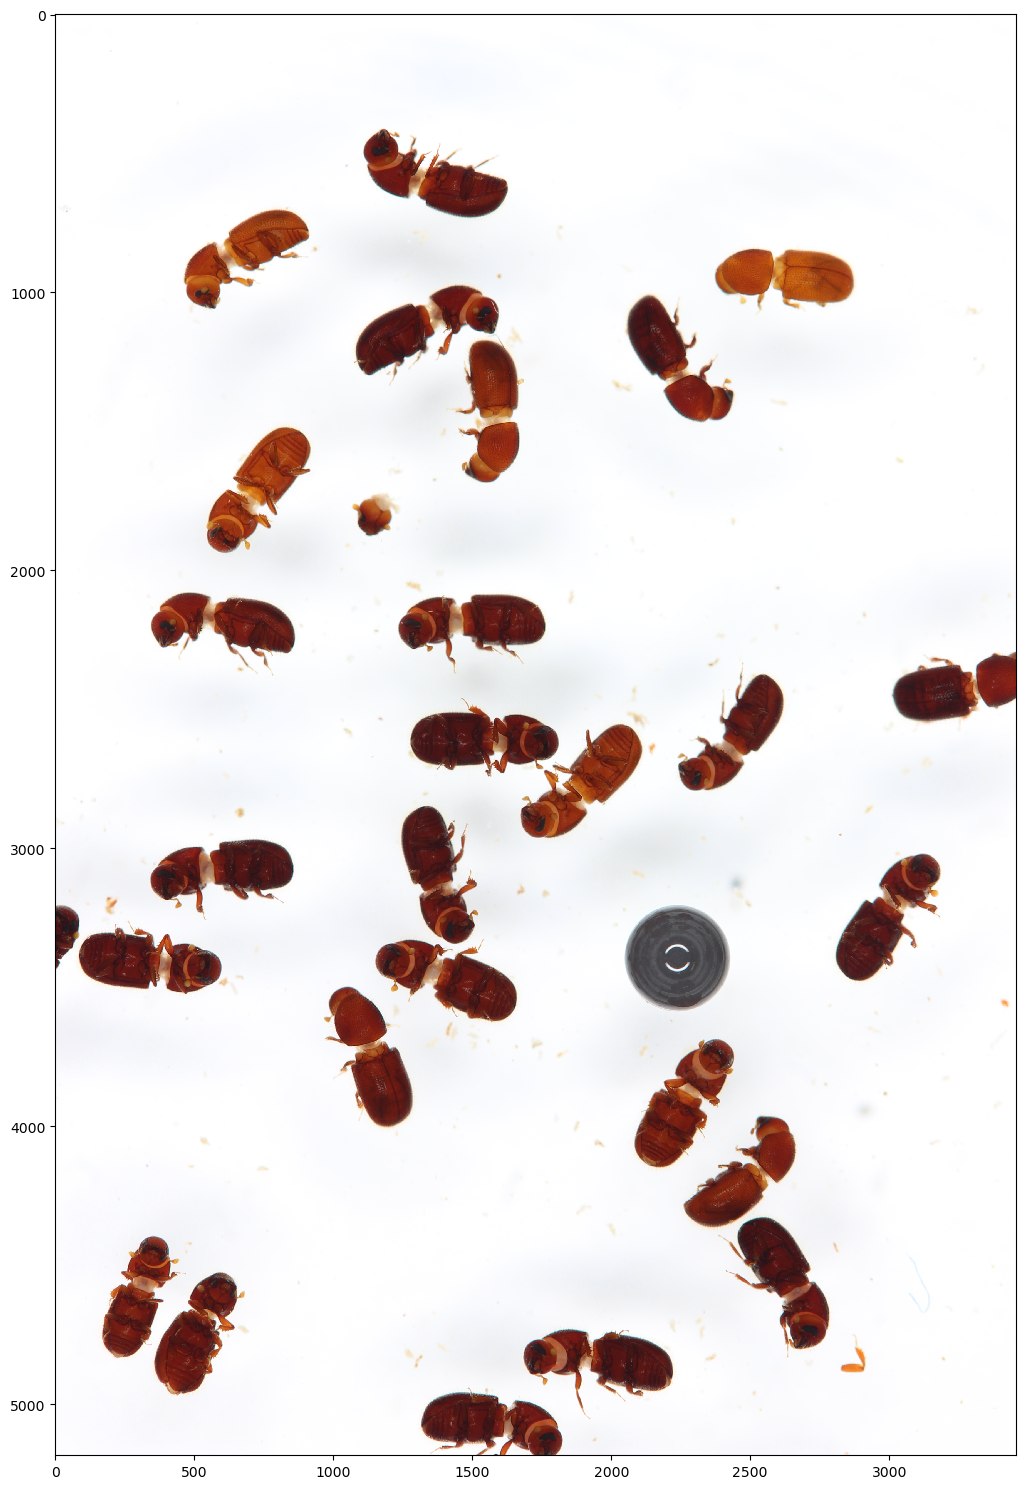

In [4]:
# input image
plt.figure(figsize=(15, 15))
io.imshow(ppi.image)
plt.show()

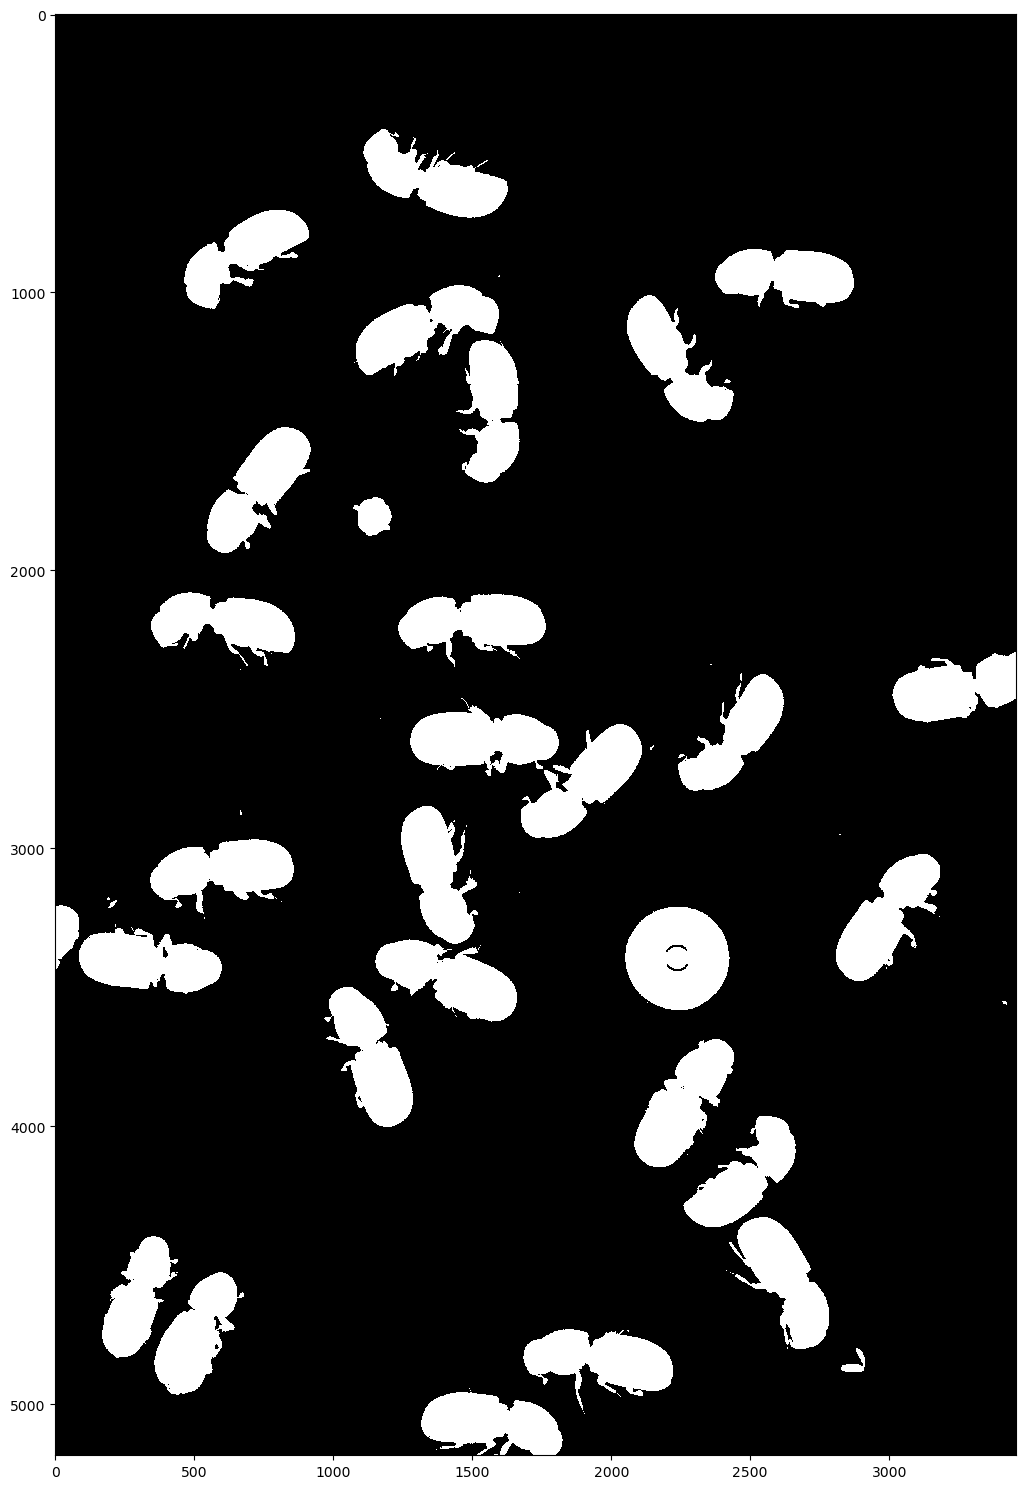

In [5]:
# input image
plt.figure(figsize=(15, 15))
io.imshow(ppi.inv_bw_image)
plt.show()

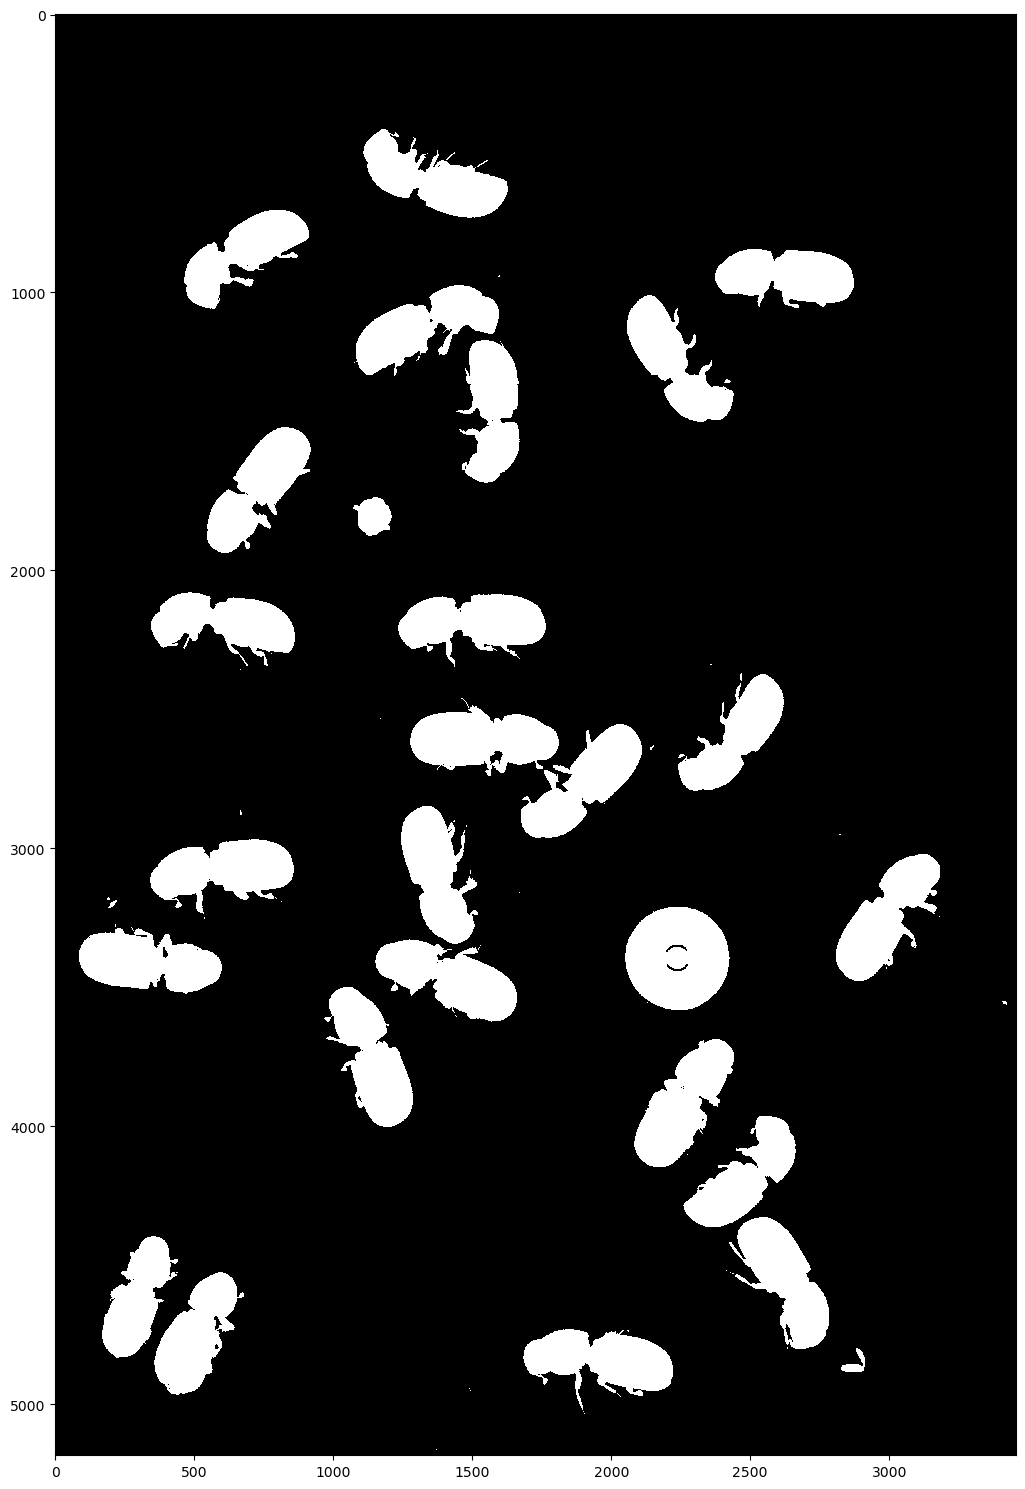

In [6]:
# input image
plt.figure(figsize=(15, 15))
io.imshow(ppi.clear_inv_bw_image)
plt.show()

# Segment compound image into smaller images

In [7]:
# apply segmentation of blobs in image
ppi.segment(cluster_num=2, image_edge_buffer=50)

C:\Users\GCM\anaconda3\envs\Seg_310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\GCM\anaconda3\envs\Seg_310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


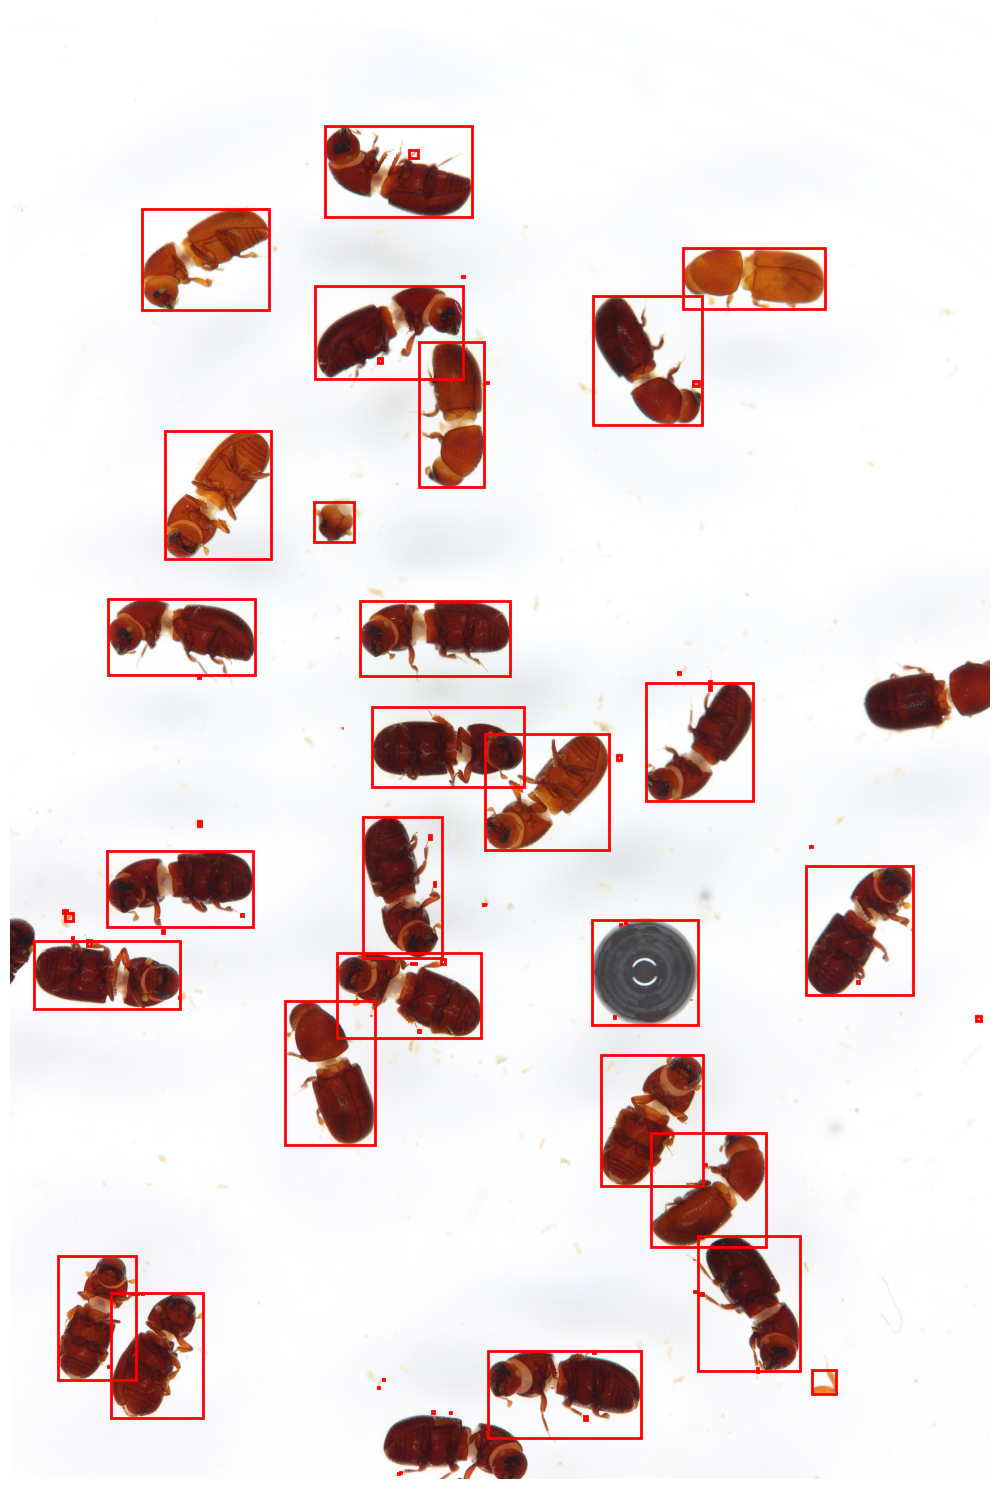

In [8]:
# plot boxes that will be used to extract 
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(ppi.image)
coord_df = ppi.image_properties_df
for i in range(len(coord_df)):
    data_i = coord_df.iloc[i]
    minr = data_i['bbox-0']
    minc = data_i['bbox-1']
    maxr = data_i['bbox-2']
    maxc =data_i['bbox-3']
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [9]:
# all artefacts dataframe
ppi.image_properties_df

centroid-0   centroid-1  bbox-0  bbox-1  bbox-2  bbox-3  orientation  \
0    595.357104  1358.039167     413    1109     733    1629     1.220466   
1    511.214660  1421.392670     497    1407     525    1439    -0.866054   
2    861.060173   675.259140     704     464    1061     914    -0.998611   
3    942.269080  2632.002454     844    2374    1057    2873     1.504812   
4    942.551724  1596.896552     940    1594     946    1600    -0.524662   
..          ...          ...     ...     ...     ...     ...          ...   
82  4945.954545  1490.500000    4942    1487    4952    1495     0.668382   
83  4949.666667  1552.111111    4948    1551    4952    1554     0.354313   
84  4967.363636  2028.151515    4961    2022    4974    2035     0.780250   
85  5160.800000  1376.600000    5160    1375    5163    1379    -0.955044   
86  5164.500000  1370.000000    5164    1369    5166    1372    -1.017222   

    axis_major_length  axis_minor_length   area  area_filled  kmeans_label  
0          595.112852         202.430340  83183        83202             0  
1           45.036492           5.664917    191          191             1  
2          550.487573         197.663702  74153        74158             0  
3          536.784968         193.624593  76613        76613             0  
4            6.867203           5.376184     29           29             1  
..                ...                ...    ...          ...           ...  
82          13.594230           2.149045     22           22             1  
83           3.885753           2.795443      9            9             1  
84          21.156220           2.281243     33           33             1  
85           4.933332           1.123493      5            5             1  
86           3.236068           1.236068      4            4             1  

[87 rows x 12 columns]

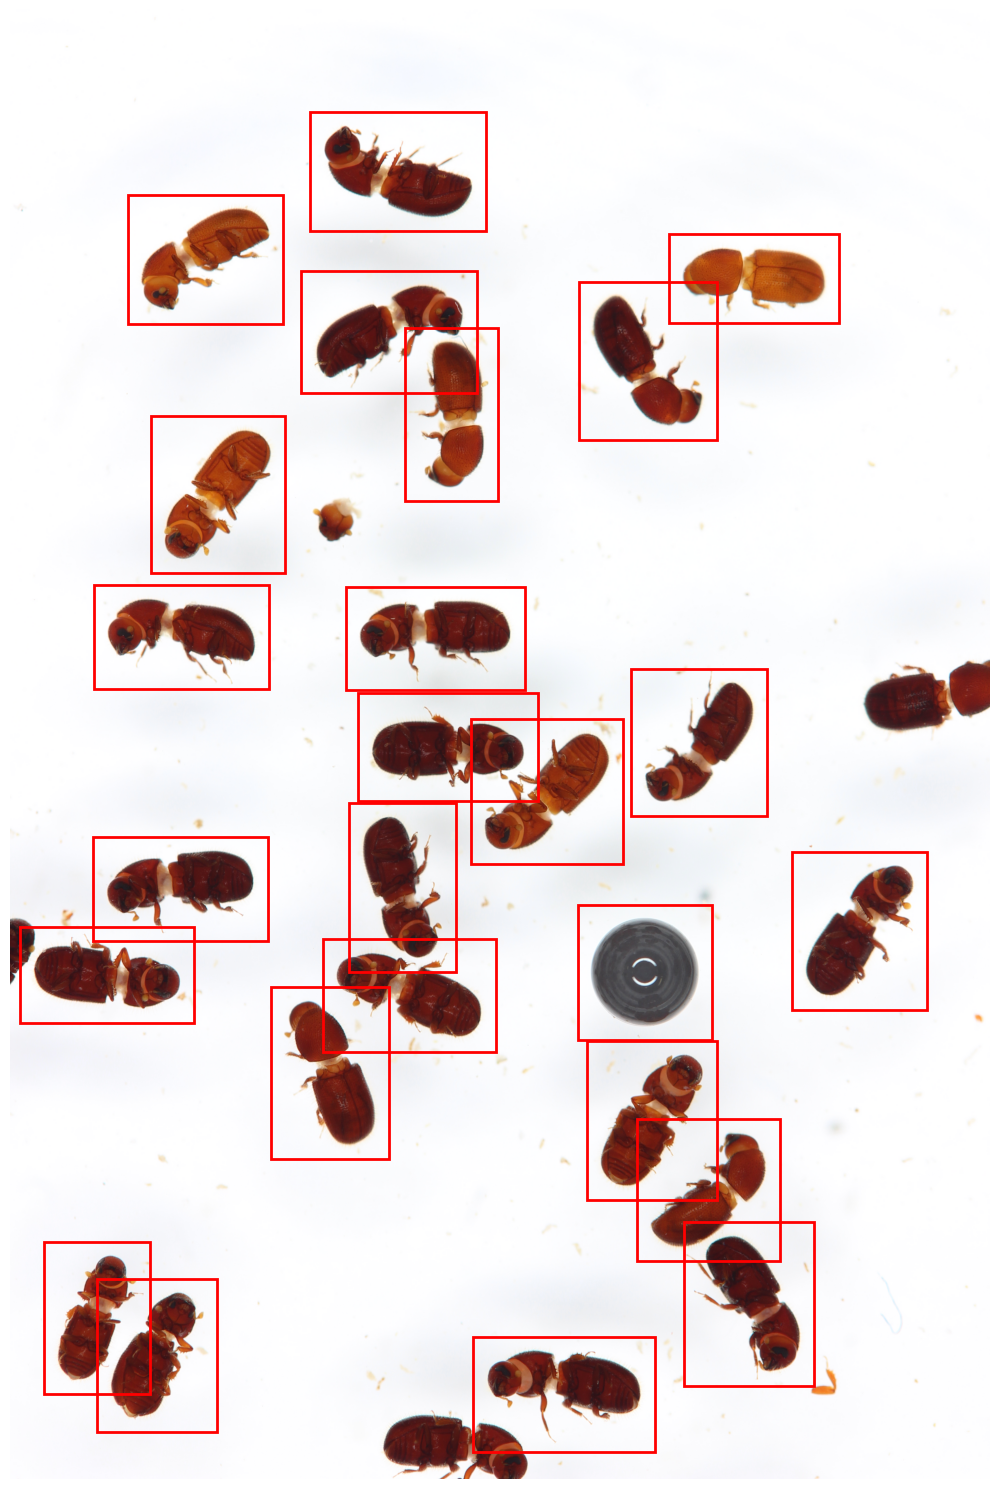

In [10]:
# plot boxes that will be used to extract 
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(ppi.image)
coord_df = ppi.image_selected_df
for i in range(len(coord_df)):
    data_i = coord_df.iloc[i]
    minr = data_i['bbox-0']
    minc = data_i['bbox-1']
    maxr = data_i['bbox-2']
    maxc =data_i['bbox-3']
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [11]:
ppi.image_selected_df

centroid-0   centroid-1  bbox-0  bbox-1  bbox-2  bbox-3  orientation  \
0    595.357104  1358.039167     363    1059     783    1679     1.220466   
1    861.060173   675.259140     654     414    1111     964    -0.998611   
2    942.269080  2632.002454     794    2324    1107    2923     1.504812   
3   1125.686449  1324.130498     925    1025    1353    1646    -1.185749   
4   1253.379650  2226.879791     961    2006    1518    2491     0.613348   
5   1425.146619  1573.110963    1123    1392    1736    1721     0.002357   
6   1704.768085   729.683874    1436     495    1989     969    -0.638646   
7   2191.407077   611.223123    2031     296    2398     914     1.455952   
8   2188.978598  1505.242609    2038    1185    2400    1814    -1.541225   
9   2597.703487  2449.313526    2326    2191    2844    2670    -0.687096   
10  2611.439278  1535.422393    2411    1227    2794    1862     1.549161   
11  2765.174112  1902.844290    2505    1625    3014    2162    -0.823036   
12  3093.114056  1373.922966    2799    1195    3395    1572     0.276973   
13  3080.309150   606.908670    2919     293    3287     908    -1.458382   
14  3249.733449  2989.760924    2971    2757    3528    3234    -0.619367   
15  3396.303120  2238.045620    3161    2001    3634    2476     1.166501   
16  3410.330374   331.750901    3236      35    3575     649     1.445620   
17  3469.865004  1418.350312    3279    1102    3677    1712     1.206370   
18  3757.008689  1138.832352    3449     919    4054    1337     0.384187   
19  3921.539971  2258.813594    3638    2034    4200    2493    -0.571488   
20  4182.933745  2481.016955    3915    2210    4415    2715    -0.775746   
21  4552.099335  2624.566330    4277    2375    4854    2835     0.508175   
22  4620.923628   295.454655    4346     119    4884     493    -0.363990   
23  4752.844864   507.506162    4477     307    5018     731    -0.467970   
24  4842.713231  1965.142573    4681    1634    5088    2273     1.444122   

    axis_major_length  axis_minor_length    area  area_filled  kmeans_label  
0          595.112852         202.430340   83183        83202             0  
1          550.487573         197.663702   74153        74158             0  
2          536.784968         193.624593   76613        76613             0  
3          601.075242         206.700923   83457        83540             0  
4          578.430817         199.994427   78272        78282             0  
5          565.294427         195.279694   75611        75648             0  
6          564.306032         201.385719   82970        82986             0  
7          580.178948         203.328806   78226        78230             0  
8          574.067384         204.452555   83171        83343             0  
9          547.674758         189.133718   71943        71947             0  
10         563.857985         211.568914   89135        90499             0  
11         575.610189         205.167794   84773        84785             0  
12         545.583513         203.663168   79601        79680             0  
13         559.979159         209.225505   83280        83296             0  
14         570.434475         207.807758   84329        84391             0  
15         376.618469         374.593957  108221       109577             0  
16         547.803244         203.099040   83003        83517             0  
17         569.982373         207.465277   86032        86059             0  
18         573.560558         201.087495   83896        84027             0  
19         551.774937         206.819141   86451        86510             0  
20         536.764864         201.709576   74726        74888             0  
21         556.934407         211.238260   83868        84543             0  
22         483.664189         177.048181   64042        64048             0  
23         493.670980         205.048519   75624        76474             0  
24         584.556130         208.026285   85030    

All images printed (25)
All images printed (25)
All images printed (25)


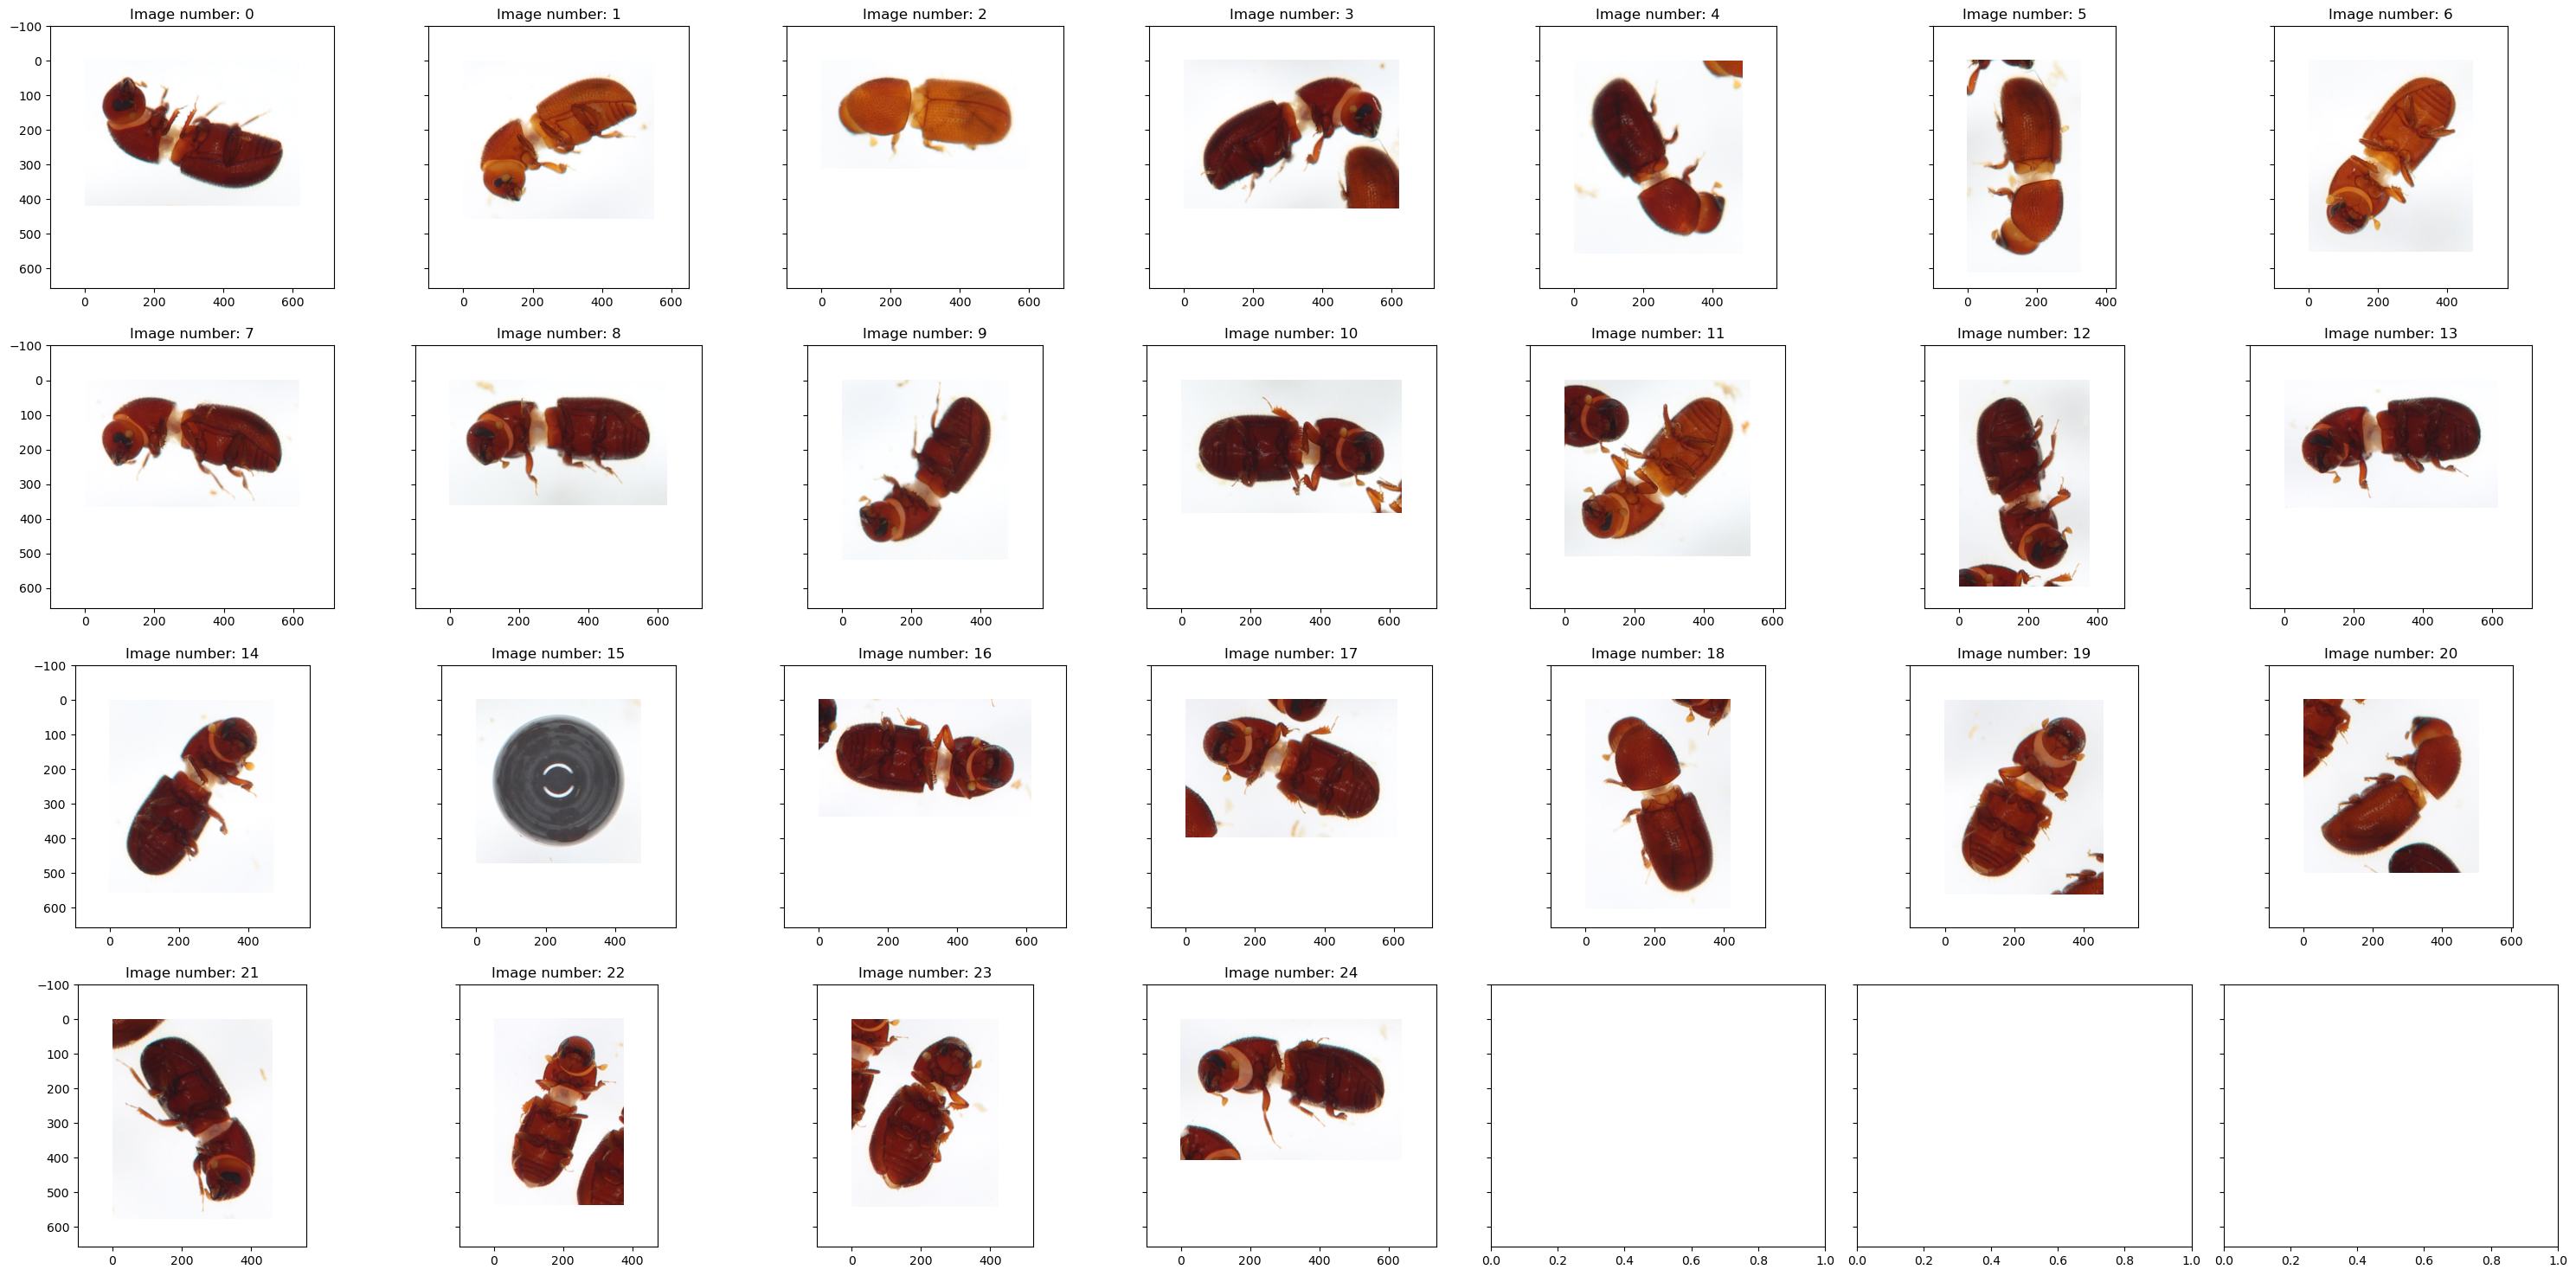

In [12]:
# define list of images
img_lst = ppi.col_image_lst

# plot pixel distribution values for all images in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
fig.set_figheight(15)
l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = axes[i][j].imshow(img_lst[l])
            axes[i][j].set_ylim(img_lst[l].shape[0]+ppi.image_edge_buffer*5, 0-ppi.image_edge_buffer*2)
            axes[i][j].set_xlim(0-ppi.image_edge_buffer*2, img_lst[l].shape[1]+ppi.image_edge_buffer*2)
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()

# Detect the outlier segment (ball bearing) from the compound image

In [13]:
# detect outlier 
ppi.detect_outlier()

All images printed (25)
All images printed (25)
All images printed (25)


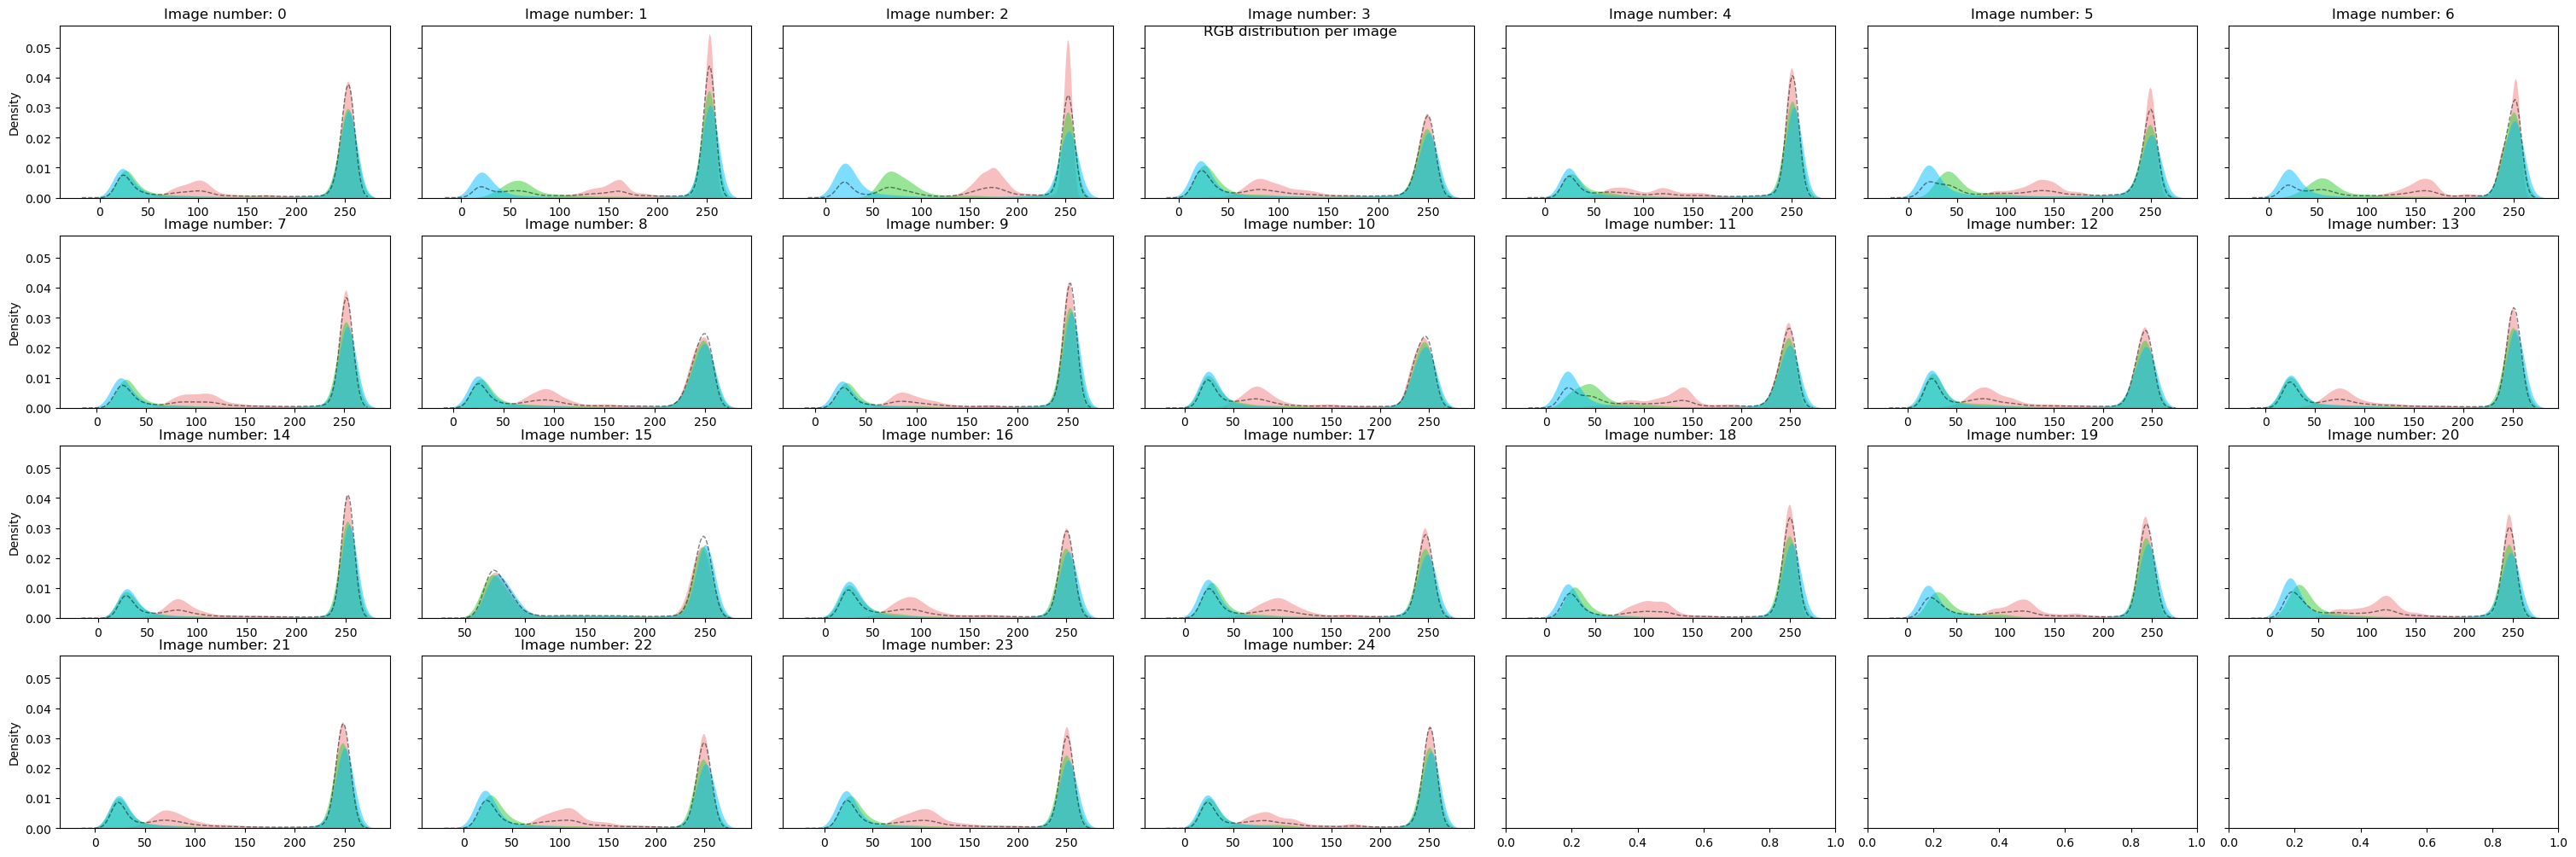

In [14]:
# plot pixel distribution values for all iamges in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
fig.suptitle('RGB distribution per image')

# initialize lists to store data in
r_ar_lst = ppi.r_ar_lst
g_ar_lst = ppi.g_ar_lst
b_ar_lst = ppi.b_ar_lst
all_ar_lst = ppi.all_ar_lst

l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = sns.kdeplot(ax=axes[i][j], data=r_ar_lst[l], color='lightcoral', fill=True, alpha=.5, linewidth=0)
            fig = sns.kdeplot(ax=axes[i][j], data=g_ar_lst[l], color='limegreen', fill=True, alpha=.5, linewidth=0)
            fig = sns.kdeplot(ax=axes[i][j], data=b_ar_lst[l], color='deepskyblue', fill=True, alpha=.5, linewidth=0)
            fig = sns.kdeplot(ax=axes[i][j], data=all_ar_lst[l], color='black', fill=False, alpha=.5, linewidth=1, linestyle='--')
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()
# fig.figure.savefig("Image_RGB_density_distribution.png")

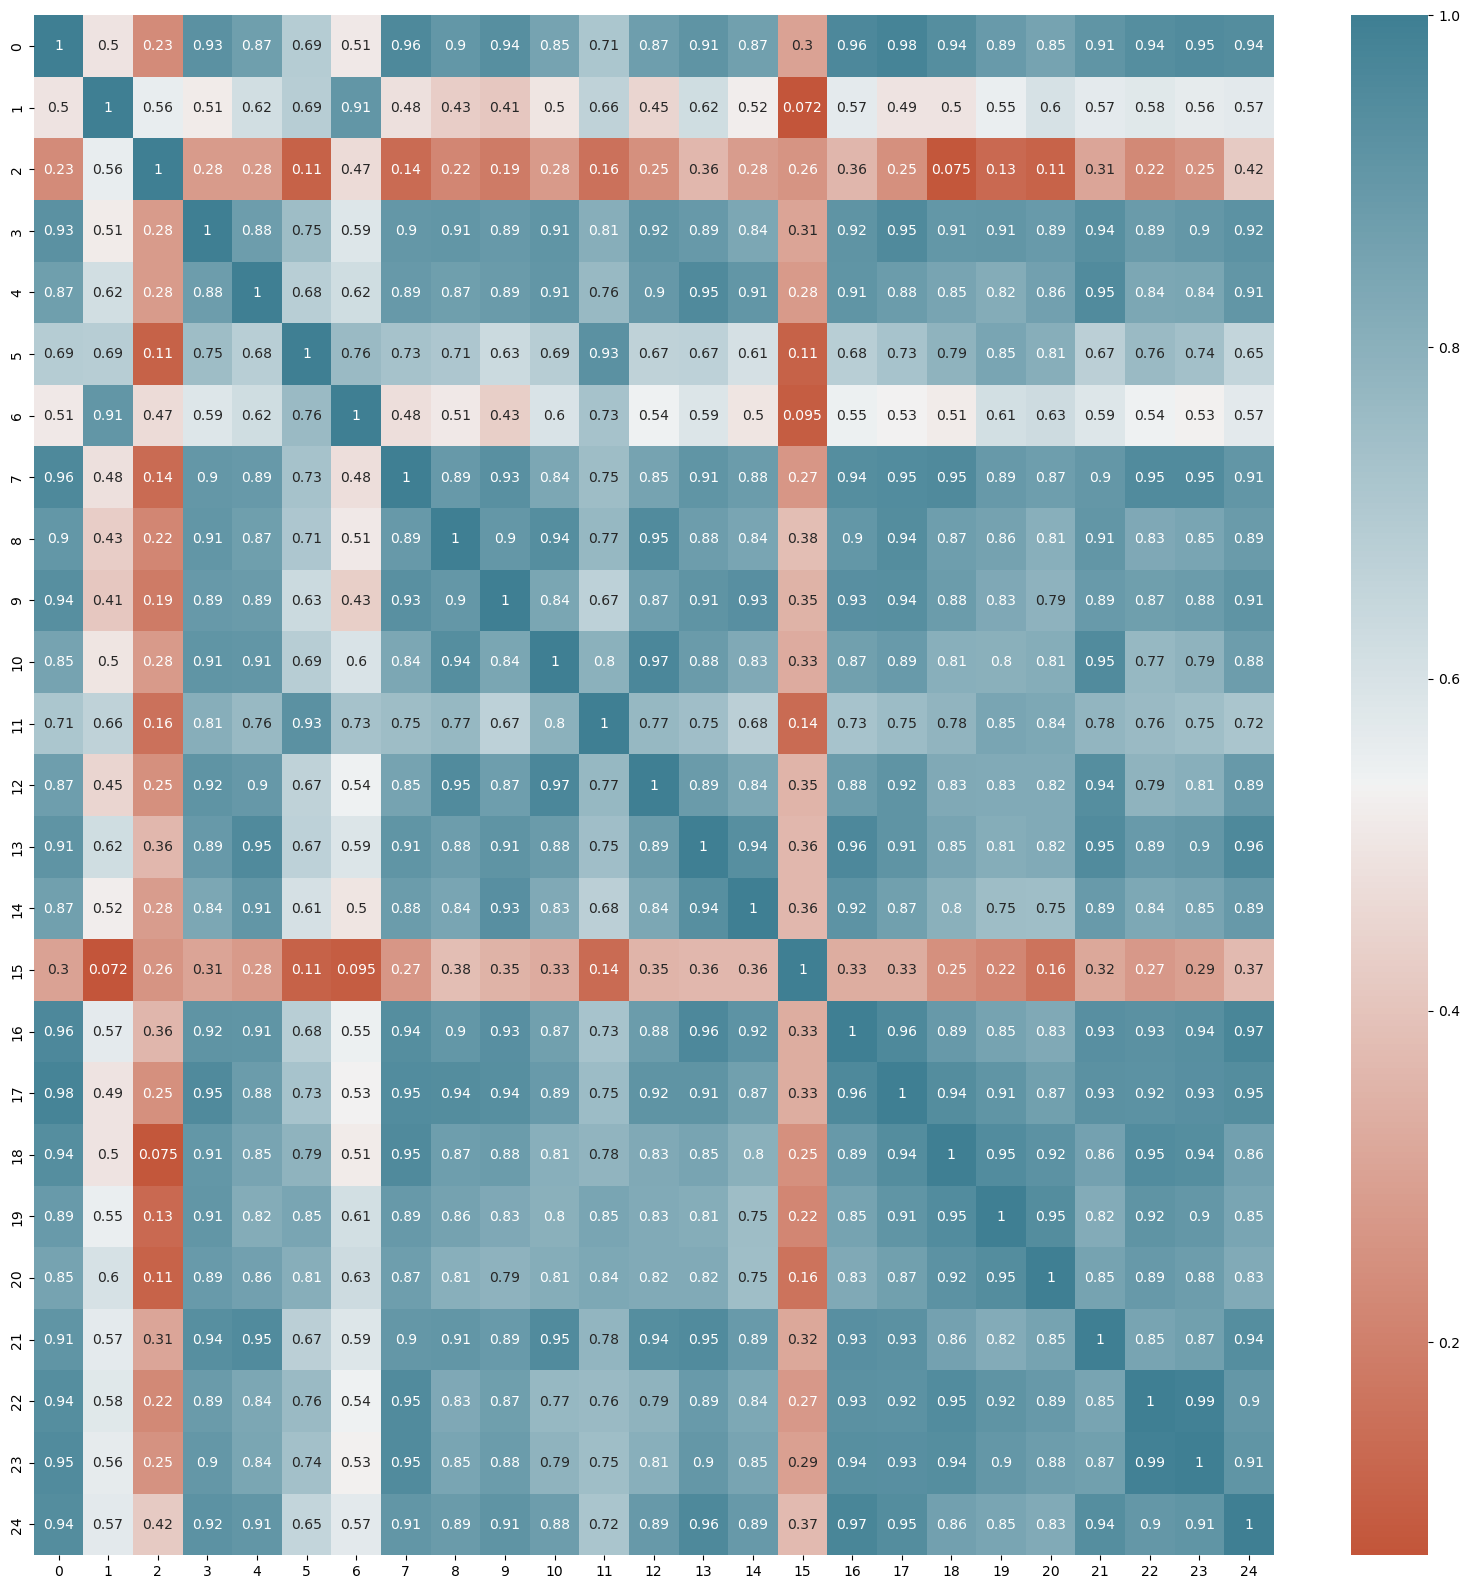

In [15]:
# Spearman correlation heatmap
corr_df = ppi.corr_coef
plt.figure(figsize=(20,20))
sns.heatmap(corr_df, annot=True, cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.show()

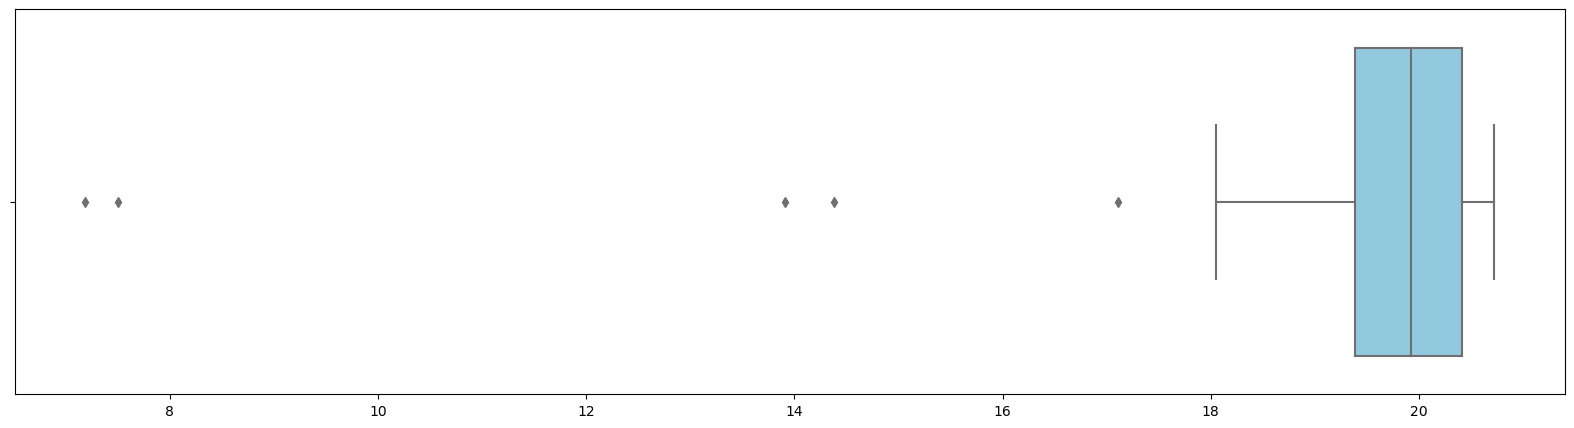

In [16]:
# plot boxplot of summmed correlation
plt.figure(figsize=(20, 5))
sns.boxplot(x=ppi.corr_coef_sum, color='skyblue')
# sns.violinplot(x=ppi.corr_coef_sum, inner="stick", color='skyblue')
plt.show()

In [22]:
list(ppi.corr_coef_sum)

[20.411780242061074,
 13.9113534295417,
 7.1902697367409525,
 20.527414335661554,
 20.164255220251718,
 17.10546956713656,
 14.381375961166656,
 20.218195981696304,
 19.957981760756436,
 19.716104115001624,
 19.718114008747385,
 18.0457667284702,
 19.77851062453325,
 20.581989551783163,
 19.384737588096293,
 7.499403893622346,
 20.693765341144243,
 20.724608527327717,
 19.91876633339335,
 19.734957395252184,
 19.44545296365379,
 20.516534892566984,
 20.086266478404895,
 20.201605293407187,
 20.618747882213345]

# Estimate size

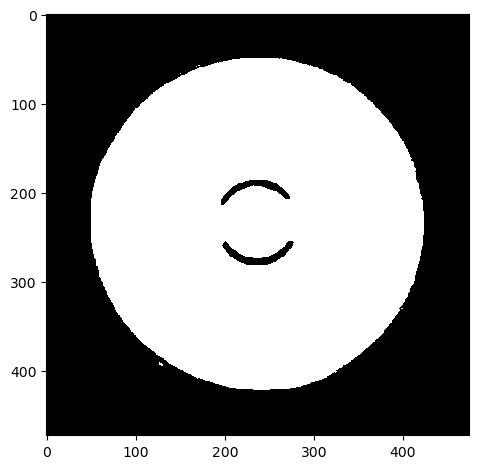

In [20]:
io.imshow(ppi.inv_bw_image_lst[15])

In [17]:
ppi.estimate_size(outlier_bw_image=ppi.outlier_bw_image, 
                          outlier_idx=ppi.outlier_idx, 
                          known_radius=1, 
                          canny_sigma=5)

IndexError: index 313 is out of bounds for axis 0 with size 313

In [ ]:
# print image detected as the outlier
io.imshow(ppi.outlier_bw_image)
plt.show()

In [ ]:
# print image detected as the outlier
bw_img = np.copy(ppi.inv_bw_image_lst[ppi.outlier_idx])
io.imshow(bw_img)
plt.show()

In [ ]:
# print image detected as the outlier
io.imshow(ppi.clean_inv_bw_image_lst[ppi.outlier_idx])
plt.show()

In [ ]:
# define list of images
img_lst = ppi.inv_bw_image_lst

# plot pixel distribution values for all iamges in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = axes[i][j].imshow(np.invert(img_lst[l]), cmap='Greys')
            axes[i][j].set_ylim(img_lst[l].shape[0]+ppi.image_edge_buffer*5, 0-ppi.image_edge_buffer*2)
            axes[i][j].set_xlim(0-ppi.image_edge_buffer*2, img_lst[l].shape[1]+ppi.image_edge_buffer*2)
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()

In [ ]:
# define list of images
img_lst = ppi.clean_inv_bw_image_lst

# plot pixel distribution values for all iamges in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = axes[i][j].imshow(np.invert(img_lst[l]), cmap='Greys')
            axes[i][j].set_ylim(img_lst[l].shape[0]+ppi.image_edge_buffer*5, 0-ppi.image_edge_buffer*2)
            axes[i][j].set_xlim(0-ppi.image_edge_buffer*2, img_lst[l].shape[1]+ppi.image_edge_buffer*2)
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()

In [ ]:
ppi.image_selected_df